In [91]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

In [92]:
x = np.load('data/test/x_test.npy')

In [93]:
y = np.load('data/test/y_test.npy')

In [94]:
np.where(x[0][1] != y[0][1])

(array([11, 14, 22, 33, 36, 44, 51, 57, 62, 79]),)

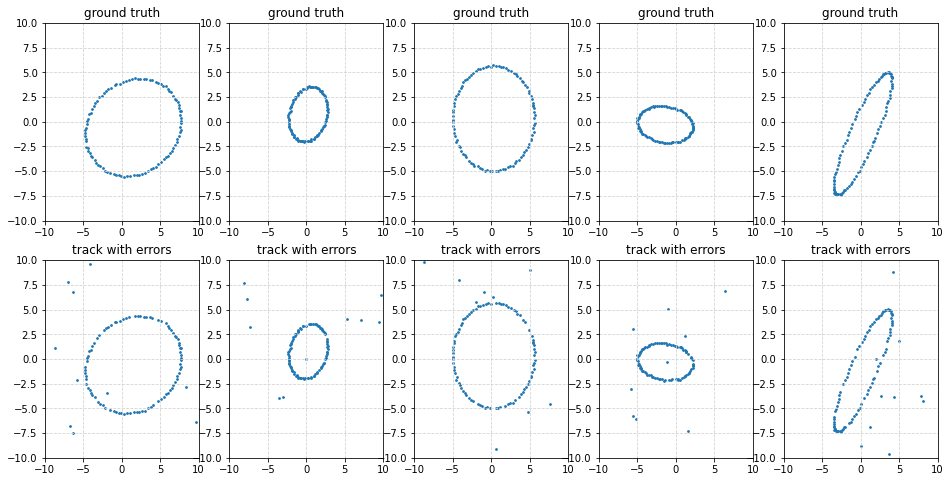

In [97]:
fig, axes = plt.subplots(2,5, figsize=(16, 8))
for i in range(10):
    ax = axes[i//5, i%5]
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    if i//5 == 0:
        ax.scatter(y[i, 0, :] , y[i, 1,:], s=3)
        ax.set_title('ground truth')
    else:
        ax.scatter(x[i%5, 0, :] , x[i%5, 1,:], s=3)
        ax.set_title('track with errors')
    ax.grid(color='lightgray',linestyle='--')
plt.show()

In [42]:
import torch
from model import BLSTM
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [22]:
input_size = 2
sequence_length = 100
num_layers = 2
hidden_size = 256
num_classes = 2

In [23]:
model = BLSTM(input_size, hidden_size, num_layers, num_classes)

In [24]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [25]:
x_test[0].shape

(2, 100)

In [37]:
input = np.transpose(x_test[12])

In [38]:
input = np.expand_dims(input, 0)

In [39]:
input.shape

(1, 100, 2)

In [40]:
input = torch.FloatTensor(input)

In [44]:
model.eval()
model.to(device)

BLSTM(
  (lstm): LSTM(2, 256, num_layers=2, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=2, bias=True)
)

In [45]:
prediction = model(input.to(device))

In [46]:
prediction.size()

torch.Size([1, 100, 2])

In [49]:
prediction = prediction.cpu().detach().numpy()

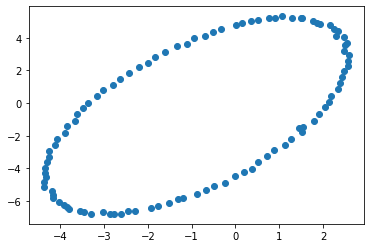

In [50]:
plt.scatter(prediction[0, :, 0], prediction[0, :, 1])

In [51]:
x_test[12].shape

(2, 100)

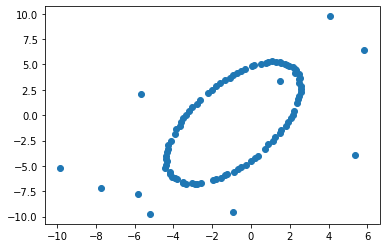

In [52]:
plt.scatter(x_test[12, 0, :], x_test[12, 1, :])

In [87]:
dif = np.where(x_test[12, 0, :] != y_test[12, 0, :])

In [88]:
dif

(array([ 0,  7, 32, 45, 56, 66, 72, 80, 81, 94]),)

In [89]:
errors = x_test[12, :, dif]

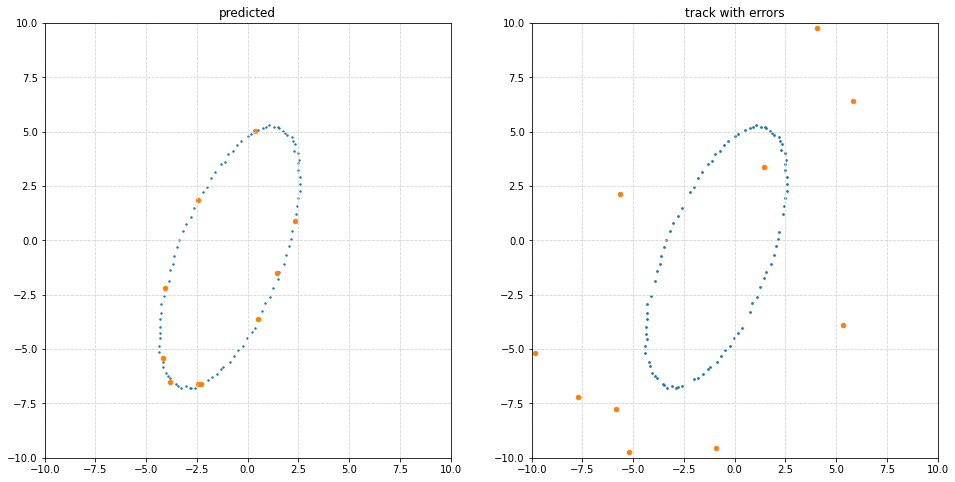

In [98]:
fig, axes = plt.subplots(1,2, figsize=(16, 8))
for i in range(2):
    ax = axes[i]
    ax.set_xlim(-10,10)
    ax.set_ylim(-10,10)
    if i == 0:
        ax.scatter(prediction[0, :, 0], prediction[0, :, 1], s=2)
        ax.scatter(prediction[0, dif, 0], prediction[0, dif, 1], s=20)
        ax.set_title('predicted')
    else:
        ax.scatter(x_test[12, 0, :], x_test[12, 1, :], s=3.0)
        ax.scatter(errors[:, :, 0], errors[:, :, 1], s=20)
        ax.set_title('track with errors')
    ax.grid(color='lightgray',linestyle='--')
plt.show()